In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataset, ds_info = tfds.load(name = "mnist", 
                             shuffle_files = True)

In [46]:
display(ds_info.features)
display(ds_info.splits)
display(type(dataset))
display(print(dataset.keys()))

print(dataset["train"])
print(dataset["test"])

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

{'test': <SplitInfo num_examples=10000, num_shards=1>,
 'train': <SplitInfo num_examples=60000, num_shards=1>}

dict

dict_keys(['test', 'train'])


None

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [47]:
train_ds = dataset["train"].batch(32)
test_ds = dataset["test"].batch(32)

print(type(train_ds))
print(type(test_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [41]:
for tmp in train_ds:
    print(tmp.keys())
    images = tmp["image"]
    labels = tmp["label"]
    
    print(images.shape)
    print(labels.shape)
    break

dict_keys(['image', 'label'])
(32, 28, 28, 1)
(32,)


### as_supervised

In [48]:
# as_supervised: X,y를 tuple로 건내준다
dataset = tfds.load(name = "mnist", 
                    shuffle_files = True,
                    as_supervised=True)

train_ds = dataset["train"].batch(32)
test_ds = dataset["test"]

for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break


(32, 28, 28, 1)
(32,)


In [54]:
# split을 이용해서 train과 test를 따로 받아옴

train_ds, test_ds = tfds.load(name = "mnist", 
                    shuffle_files = True,
                    as_supervised=True,
                    split = ["train", "test"])

train_ds = train_ds.batch(32)


for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break




(32, 28, 28, 1)
(32,)


In [87]:
(train_ds, test_ds), ds_info = tfds.load(name = "mnist", 
                                         shuffle_files = True,
                                         as_supervised=True,
                                         split = ["train", "test"], 
                                         with_info = True, 
                                         batch_size = 9)

train_ds.shuffle(300)

<ShuffleDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

In [88]:
train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
images = images.numpy()
labels = labels.numpy()
print(images.shape)
print(labels.shape)

(9, 28, 28, 1)
(9,)


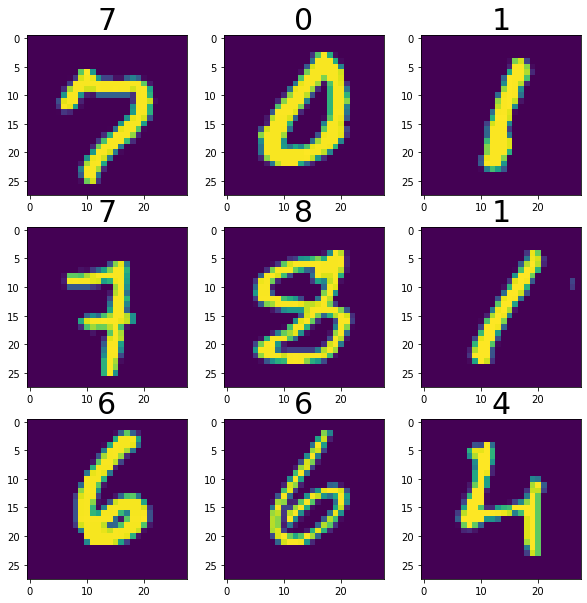

In [89]:
fig,axes = plt.subplots(3,3,figsize = (10,10))

for ax_idx, ax in enumerate(axes.flat):
    ax.imshow(images[ax_idx,...])
    ax.set_title(labels[ax_idx], fontsize = 30)
    